In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/offline/projects/ml/biometricECG/")
!ls

data256x256	    data480x480.ipynb	environment.yml  __pycache__  venv
data256x256.ipynb   data480x480.pickle	LICENSE		 rawdata
data256x256.pickle  data_processing.py	media		 README.md
data480x480	    ecglabels.csv	model.py	 trials


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle

np.random.seed(123)

Shape: (2240, 480, 480)
Min: 40 Max: 255


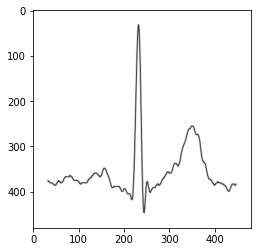

In [28]:
# load dataset
pickleIn = open('data480x480.pickle', 'rb')
categories, y, x = pickle.load(pickleIn)

x = np.array(x)
y = np.array(y)

print('Shape:', x.shape)
print('Min:', x.min(), 'Max:', x.max())
plt.imshow(x[0], cmap='gray')
plt.show()

In [25]:
# split data
train, validation, test = 0.7, 0.15, 0.15

# train 70% since test is 30%
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=1 - train, shuffle=True, random_state=42)

# test 15%, validation 15%
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=test / (test + validation), random_state=3)

Min: 0.007300122156931786 Max: 0.05819815889874859
Shape: (1567, 230400)


TypeError: ignored

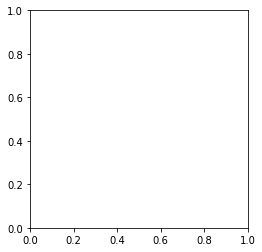

In [26]:
# normalize data
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_val = tf.keras.utils.normalize(x_val, axis=1).reshape(x_val.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

print('Min:', x_train.min(), 'Max:', x_train.max())
print('Shape:', x_train.shape)

plt.imshow(x_train[0], cmap='gray')
plt.show()

plt.imshow(x_val[0], cmap='gray')
plt.show()

plt.imshow(x_test[0], cmap='gray')
plt.show()

In [11]:
# building the model
model = Sequential()

model.add(Conv2D(256, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [12]:
# training the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1]:
# fitting the model
model.fit(x_train, y_train, batch_size=32, epochs=5,
          verbose=1, validation_data=(x_val, y_val),)

val_loss, val_acc = model.evaluate(x_val, y_val)
print('Loss:', val_loss, 'Acc:', val_acc)

NameError: ignored